# Fourier Filters

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [4]:
start = time.time()

### Fourier Series

We can represen a function $ f(x) $ defined over the interval $ [-L, L] $ using the Fourier Series:

$ f(x) = \cfrac{1}{2} \cdot a_0 + \sum_{n=1}^{\infty} \left[ a_n \cdot cos \left( \cfrac{n \cdot \pi \cdot x}{L} \right) + b_n \cdot sin \left( \cfrac{n \cdot \pi \cdot x}{L} \right) \right] $

where the corresponding Fourier coefficients are given by:

$ a_n = \cfrac{1}{L} \cdot \int_{-L}^{L} f(x) \cdot cos \left( \cfrac{n \cdot \pi \cdot x}{L} \right) dx $

$ b_n = \cfrac{1}{L} \cdot \int_{-L}^{L} f(x) \cdot sin \left( \cfrac{n \cdot \pi \cdot x}{L} \right) dx $

### FFT

La transformada rápida de Fourier, conocida por la abreviatura FFT (del inglés Fast Fourier Transform) es un algoritmo eficiente que permite calcular la transformada de Fourier discreta (DFT) y su inversa. La FFT es de gran importancia en una amplia variedad de aplicaciones, desde el tratamiento digital de señales y filtrado digital en general a la resolución de ecuaciones en derivadas parciales o los algoritmos de multiplicación rápida de grandes entero

### Filter

To apply a filter we have to follow the next steps:

1. Apply FFT
2. Apply Filter
3. Apply Inverse FFT

# 1. Load Datasets

In [5]:
def transform_date(date):

    try:

        new_date = date.year + (date.month - 1)/12 + date.day/365

        return new_date
    
    except:

        return float('nan')

In [6]:
def transform_value(value):

    try:

        return float(value)
    
    except:

        return float('nan')

In [7]:
df_1 = pd.read_csv('Temp.csv', skiprows = [3652])
df_2 = pd.read_csv('AirPassengers.csv')

df_1 = df_1.rename(columns = {'Date': 'Time', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990': 'X_t'})
df_2 = df_2.rename(columns = {'Month': 'Time', '#Passengers': 'X_t'})

df_1['Time'] = pd.to_datetime(df_1['Time'])
df_2['Time'] = pd.to_datetime(df_2['Time'])

df_1['Time'] = df_1['Time'].map(lambda x: transform_date(x))
df_2['Time'] = df_2['Time'].map(lambda x: transform_date(x))

df_1['X_t'] = df_1['X_t'].map(lambda x: transform_value(x))
df_2['X_t'] = df_2['X_t'].map(lambda x: transform_value(x))

df_1 = df_1.dropna()
df_2 = df_2.dropna()

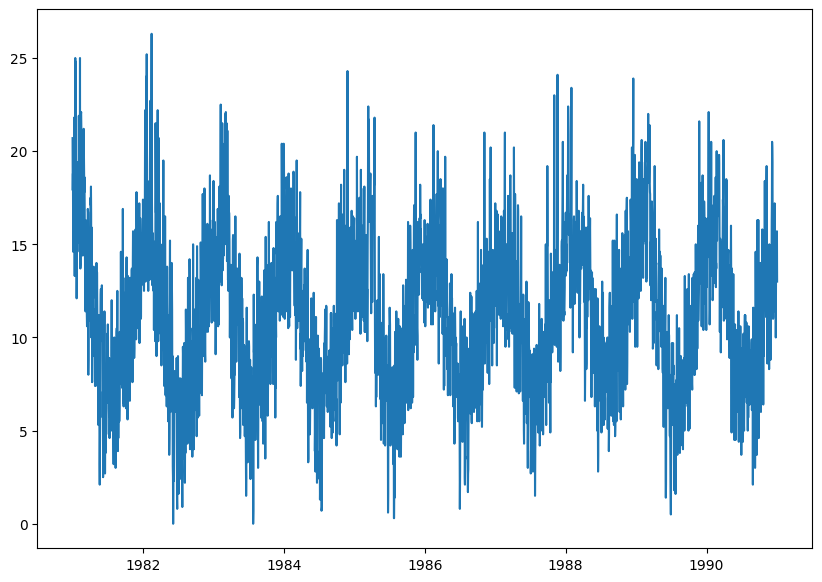

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'])
plt.show()

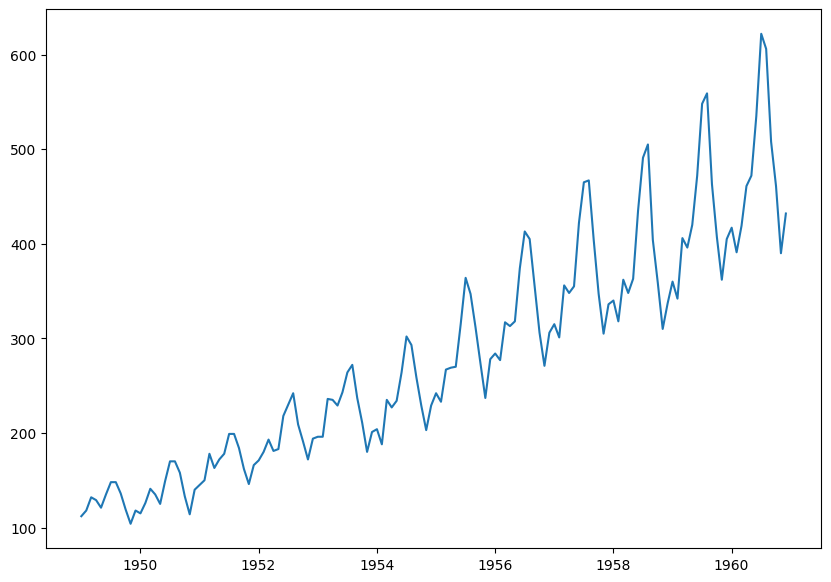

In [9]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['X_t'])
plt.show()

# 2. Apply FFT

In [10]:
df_1_ff = np.fft.fft(df_1['X_t'])
df_1_ff = df_1_ff.real
df_1['ff'] = df_1_ff

In [11]:
df_2_ff = np.fft.fft(df_2['X_t'])
df_2_ff = df_2_ff.real
df_2['ff'] = df_2_ff

# 3. Filters

**Low Pass:** This filter delete the data with low frequency for example outliers.
**High Pass:** This filter delete the data with high frequency remains only the outliers.

In [12]:
tr_1 = 1_000
df_1['low_pass'] = (abs(df_1['ff']) < tr_1)*0 + (abs(df_1['ff']) >= tr_1)*df_1['ff']
df_1['high_pass'] = (abs(df_1['ff']) < tr_1)*df_1['ff'] + (abs(df_1['ff']) >= tr_1)*0

In [13]:
tr_2 = 2_000
df_2['low_pass'] = (abs(df_2['ff']) < tr_2)*0 + (abs(df_2['ff']) >= tr_2)*df_2['ff']
df_2['high_pass'] = (abs(df_2['ff']) < tr_2)*df_2['ff'] + (abs(df_2['ff']) >= tr_2)*0

# 4. Inverse FFT

In [14]:
df_1['low_pass_X_t'] = np.fft.ifft(df_1['low_pass'])
df_1['high_pass_X_t'] = np.fft.ifft(df_1['high_pass'])

In [15]:
df_2['low_pass_X_t'] = np.fft.ifft(df_2['low_pass'])
df_2['high_pass_X_t'] = np.fft.ifft(df_2['high_pass'])

# 5. Plot

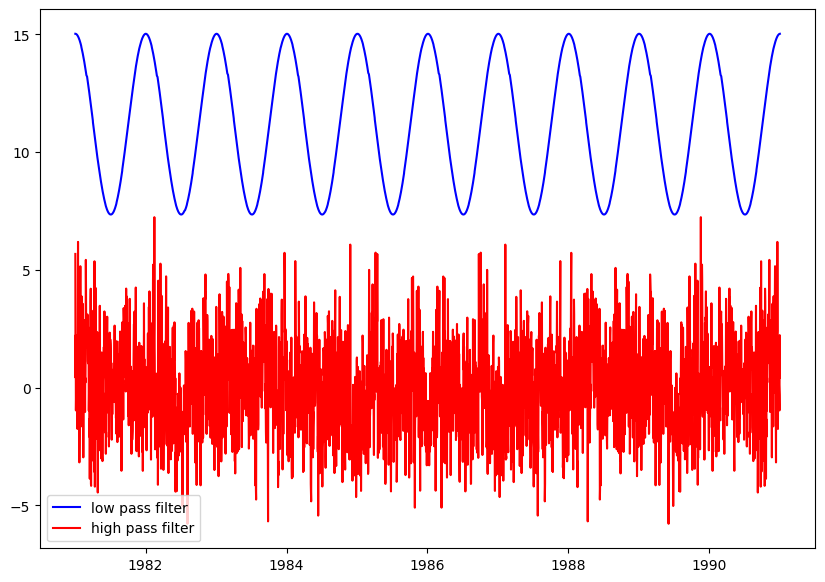

In [16]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['low_pass_X_t'], color = 'blue', label = 'low pass filter')
plt.plot(df_1['Time'], df_1['high_pass_X_t'], color = 'red', label = 'high pass filter')
plt.legend()
plt.show()

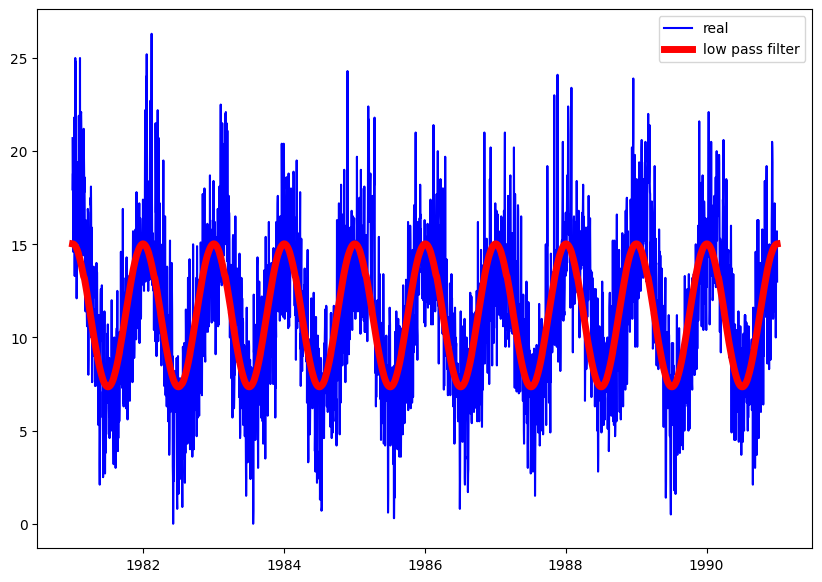

In [17]:
plt.figure(figsize = (10, 7))
plt.plot(df_1['Time'], df_1['X_t'], color = 'blue', label = 'real')
plt.plot(df_1['Time'], df_1['low_pass_X_t'], color = 'red', label = 'low pass filter', linewidth = 5)
plt.legend()
plt.show()

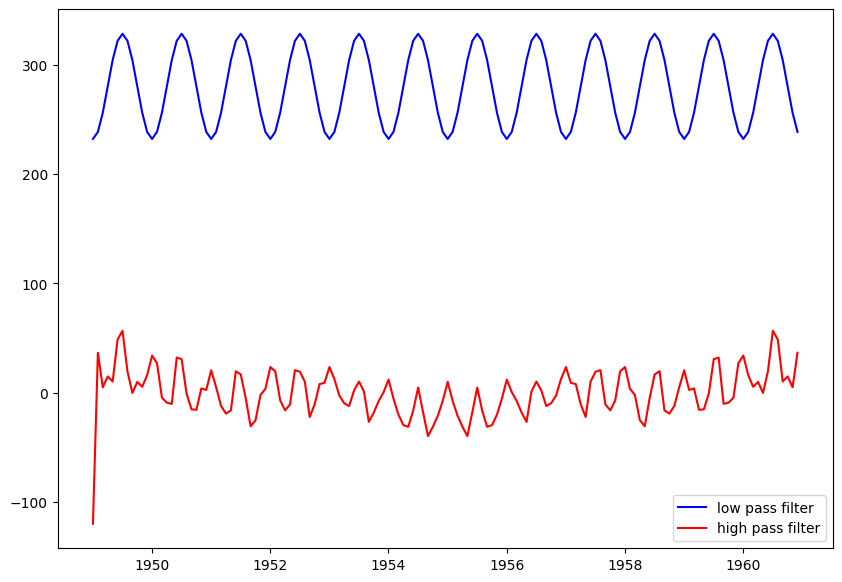

In [18]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['low_pass_X_t'], color = 'blue', label = 'low pass filter')
plt.plot(df_2['Time'], df_2['high_pass_X_t'], color = 'red', label = 'high pass filter')
plt.legend()
plt.show()

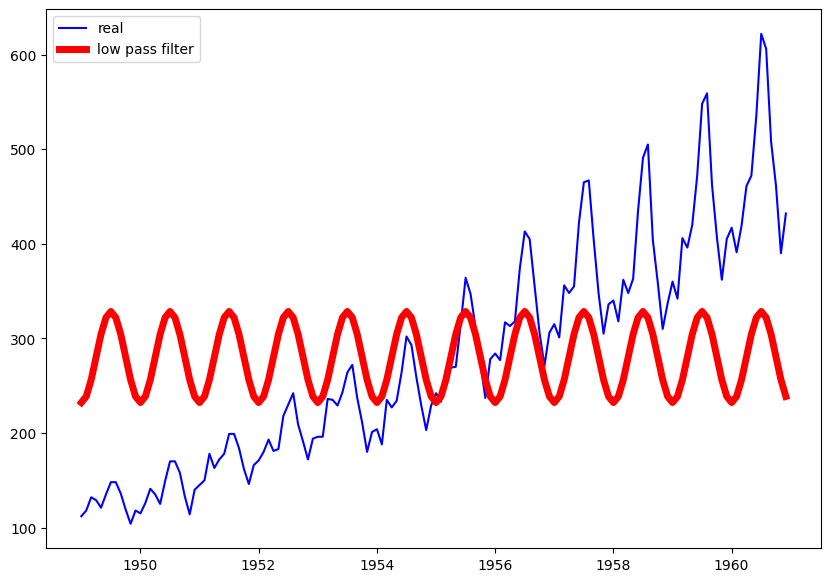

In [19]:
plt.figure(figsize = (10, 7))
plt.plot(df_2['Time'], df_2['X_t'], color = 'blue', label = 'real')
plt.plot(df_2['Time'], df_2['low_pass_X_t'], color = 'red', label = 'low pass filter', linewidth = 5)
plt.legend()
plt.show()

### Time of execution

In [20]:
end = time.time()

In [21]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 0 seconds.
